<img align="left" src="https://drive.google.com/uc?export=view&id=1orv1XTixxkcGADz18uSwN_5kCtd1yM7q" alt="drawing" width="100%"/>

<img align="left" src="https://drive.google.com/uc?id=1dUhDyLOrHHP0ghjdb2ZhvyQZ0ZpcmoIm" alt="drawing" width="200"/> **<font color = 2b2b99 face="Times New Roman" size=7>L'apprentissage supervisé : un cadre général basé sur scikit-learn</font>**

L'objectif de ce tutoriel est de présenter un gabarit/pipeline pour s'attaquer à des problèmes d'apprentissage supervisé avec la librairie `scikit-learn` dans Python.
Nous supposons que vous avez déjà une familiarité avec ce langage de programmation, puisque les introductions aux librairies de base telles que `numpy` et `pandas` ne présentent que les concepts essentiels pour aborder le gabarit.

In [ ]:
#@markdown ### <font size=6 color='Red' face = "Times New Roman"> &nwarr; Exécutez cette cellule avant de débuter.</font>
#@markdown ### <font size=4 color='Red' face = "Times New Roman"> Ceci prend environ 2 minutes.</font>

# NE PAS TOUCHER À CETTE CELLULE
# Cette cellule installe les bibliothèques nécessaires pour que le calepin fonctionne.
# ici on spécifie les versions des bibliothèques
!pip install -q numpy==1.21.5 &> /dev/null #cache les erreurs de dépendance de numpy pour des packages qu'on n'utilise pas
!pip install -q matplotlib==3.2.2 &> /dev/null
!pip install -q imgaug==0.2.5 &> /dev/null
!pip install -q scikit-learn==1.0.2 &> /dev/null
!pip install -q librosa==0.8.1 &> /dev/null
!pip install -q scikit-image==0.18.2 &> /dev/null
!pip install -q pandas==1.3.5 &> /dev/null
!pip install -q requests==2.23.0 &> /dev/null
!pip install -q plotly==5.5.0 &> /dev/null


# # Il faut repartir le kernel
import warnings
import sys
with warnings.catch_warnings():
    print("Le calepin est prêt à être utilisé.")
    print("Si vous voyez un message de 'crash' en bas à gauche, c'est normal. ")
    exit()

# <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> **<font color = "3832ba" face="Times New Roman" size=6>Les préalables</font>**

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Introduction à l'environnement Colab</font>



- Enregistrer sa propre copie modifiable et enregistrable;
- Naviguer dans le notebook;
- Survol du matériel.

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Ressources d'introduction à Python</font>




1.   https://courspython.com/
2.   https://docs.python.org/fr/3/tutorial/



## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Introduction à `NumPy`</font>


> Cette librairie permet d'effectuer des calculs efficaces sur les matrices.

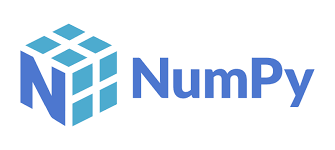

Basée sur :
*  https://numpy.org/doc/stable/user/absolute_beginners.html
 



### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Prérequis de Numpy</font>

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1. Allez chercher la librairie ***numpy***.

In [ ]:
#--------------------------------------------------------------------
# Recherche de la librairie numpy.
#--------------------------------------------------------------------

import numpy as np

### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Manipulation de matrices</font>


Soit la matrice suivante : 
$$
A =
\begin{pmatrix}
5 & 1 \\
3 & 2 \\
\end{pmatrix}
$$ et les vecteurs $\vec{u} = \left( 1, 6, 7, 3, 4 \right) $ et $\vec{v} = \begin{pmatrix}
5 \\
3 \\
1 \\
2 \\
3 \\
2 \\
5 \\
\end{pmatrix} $. 


> #### Représentation
> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1. Représentez $\vec{u}$, $\vec{v}$ et A.
2. Quelles sont les dimensions de $\vec{u}$, $\vec{v}$ et A?

In [ ]:
u = np.array([[1, 6, 7, 3, 4]])

v = np.array([5, 3, 1, 2, 3, 2, 5])

# A a deux lignes [5, 1] et [3, 2]
A = np.array([[5, 1], [3, 2]])

print('Affichons la matrice A \n %s ' % A)
print('\nLes dimensions de la matrice A sont\n %d x %d' % (A.shape[0], A.shape[1]))
print('\nLes dimensions du vecteur u sont\n %d x %d' % (u.shape[0], u.shape[1]))

>  #### Extraction d'éléments
> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1.   Extrayez le sous-vecteur de u formé du 2$^{e}$ au 4$^{e}$ élément.
2.   Extrayez le sous-vecteur de v formé du 1$^{er}$ au 3$^{e}$ élément.
3.   Extrayez les éléments de A qui sont > que 1 et < que 4 et qui sont des multiples de 2.

In [ ]:
# Extrayons le sous-vecteur de u formé du 2e au 4e élément.
u_col_2_4 = u[:, 2:5]
print('\nLe sous-vecteur de u formé du 2e au 4e élément est \n %s' % u_col_2_4)

# Extrayons le sous-vecteur de v formé du 1er au 3e élément.
v_row_1_3 = v[1:4]
print('\nLe sous-vecteur de v formé du 1er au 3e élément est \n %s' % v_row_1_3)

# Extrayons les éléments de A qui sont > que 1 et < que 4 et qui sont des multiples de 2.
A_condition = A[(A > 1) & (A < 4) & (A % 2 == 0)]
print('\nLes éléments de A > 1, < 4 et multiples de 2 sont \n %s' % A_condition)

> #### Statistiques de base
<img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1.   Maximum de A.
2.   Minimum de A.
3.   La somme de tous les éléments de A.

In [ ]:
# Le maximum, minimum, somme des éléments de A.
max_A = A.max()
min_A = A.min()
sum_A = A.sum()
print('\nLe minimum de A est \n %d' % min_A)
print('\nLe maximum de A est \n %d' % max_A)
print('\nLa somme des éléments de A est \n %d' % sum_A)

> #### Bon à savoir
<img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1.   Quels sont les éléments uniques de v, leurs indices et leurs fréquences?
2.   Quels sont les indices des éléments uniques de v?
3.   Quelles sont les fréquences des éléments uniques de v?
4.   Comment aplatir une matrice?

In [ ]:
# les éléments uniques de v, leurs indices et leurs fréquences.
v_unique = np.unique(v)
_, v_unique_indices = np.unique(v, return_index = True)
_, v_unique_frequences = np.unique(v, return_counts = True)

print('\nLes éléments uniques de v sont \n %s' % v_unique)
print('\nLes indices des éléments uniques de v sont \n %s' % v_unique_indices)
print('\nLes fréquences des éléments uniques de v sont \n %s' % v_unique_frequences)

# Aplatir une matrice.
A_aplatie = A.flatten()
print('\nLa matrice aplatie de A est \n %s' % A_aplatie)

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Introduction à `Pandas`</font>
> Pandas offre un certain nombre de facilités en ce qui concerne les tableaux de données qui ont des étiquettes (par exemple, ils ont des noms de colonnes et de lignes). 

https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX

Basée sur :
* https://pandas.pydata.org/docs/user_guide/index.html


### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Prérequis de Pandas</font>

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
* Installez pandas.

In [ ]:
import pandas as pd

### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Création de tableaux de données</font>

**Mise en situation** :

Vous faites une enquête auprès de 10 personnes à la station de métro Côte-Vertu. Vous leur demandez leur date de naissance, leur province d'origine et leur revenu. Voici les données obtenues :


*   Les naissances : 1990, 1995, 1992, 1997, 1994, 1994, 1993, 1990, 1992, 1990.
*   Les provinces : Québec (QC), Alberta (AB), Québec (QC), Nouveau-Brunswick (NB), Ontario (ON), Québec (QC), Nouveau-Brunswick (NB), Québec (QC), Alberta (AB), Ontario (ON).
*   Les revenus ($) : 25000, 30000, 18000, 22000, 27000, 23500, 21250, 26750, 19900, 20500.



> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1.   Construisez un tableau de données à partir de ces informations.
2.   Affichez les quatre (4) premières lignes du tableau.
4.   Affichez les quatre (4) dernières lignes du tableau.

In [ ]:
naissances = [1990, 1995, 1992, 1997, 1994, 1994, 1993, 1990, 1992, 1990]
provinces = ['QC', 'AB', 'QC', 'NB', 'ON', 'QC', 'NB', 'QC', 'AB', 'ON']
revenus = [25000, 30000, 18000, 22000, 27000, 23500, 21250, 26750, 19900, 20500]

tableau = pd.DataFrame({'Naissance': naissances, 
                        'Province': provinces,
                        'Revenu': revenus})

tableau_debut = tableau.head(4) # les 4 premières lignes du tableau
tableau_fin = tableau.tail(4) # les 4 dernières lignes du tableau

print('Les 4 premières lignes du tableau sont : \n %s' % tableau_debut)
print('\n ----------------------------------------------------------- ')
print(' ----------------------------------------------------------- \n')
print('\n Les 4 dernières lignes du tableau sont : \n %s' % tableau_fin)


### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Manipulations de base</font>


> #### Extraction de valeurs

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
*  Extrayez du tableau tous les individus qui vivent au Québec (QC) et qui ont un revenu entre 19000 et 26000, et qui sont nés entre 1990 et 1993.

In [ ]:
tableau_conditions = tableau[(tableau.Province == 'QC') &
                             (tableau.Revenu >= 19000) & 
                             (tableau.Revenu <= 26000) &
                             (tableau.Naissance >= 1990) & 
                             (tableau.Naissance <= 1993)]
tableau_conditions



> #### Extraction de lignes et colonnes

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
*  Extrayez du tableau la date de naissance et le revenu du 2$^{e}$ et 6$^{e}$ individu.


In [ ]:
tableau.loc[[2, 6], ['Naissance', 'Revenu']]



> #### Quelques statistiques par groupe

>  <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
*  Quelle est la moyenne des salaires par province d'origine?


In [ ]:
tableauSalaireMoyenParProvince = tableau[['Province', 'Revenu']].groupby("Province").mean()
tableauSalaireMoyenParProvince

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Introduction à `scikit-learn`</font>

basée sur :

- https://scikit-learn.org/stable/

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Prérequis de scikit-learn</font>

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1. Allez chercher sklearn, le nom de la bibliothèque de scikit-learn.

In [ ]:
# Chargement de la librairie sklearn.
import sklearn

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Modules et aide sur sklearn</font>

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1. Listez tous les modules de sklearn.
2. Quelles sont les différentes fonctions du module model_selection de sklearn?
3. Trouvez deux façons de chercher de l'aide d'une fonction.



In [ ]:
# Tous les modules de sklearn
sklearn.__dict__['__all__']

In [ ]:
# Fonctions dans le module model_selection de sklearn.
from sklearn import model_selection
model_selection.__dict__['__all__']

In [ ]:
# Aide de fonctions.
# Par exemple, vous souhaitez voir des exemples d'utilisation de np.sum.
help(np.sum) # ou ? np.sum

# <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> **<font color = "3832ba" face="Times New Roman" size=6>Un gabarit d'apprentissage supervisé</font>**

On a un ensemble de données *d'entraînement* $S = \{(x_1, y_1), ..., (x_n,y_n)\}$.
On cherche à apprendre un modèle $f(x)= \hat y$ où $\hat y$ est le plus similaire possible à $y$ pour toutes les paires $(x, y)$ possibles, même celles qui ne sont pas dans l'ensemble d'entraînement. 
Ce notebook introduit un gabarit qui encapsule les différents composants d'un programme d'apprentissage supervisé.
Un avantage majeur de ce gabarit est qu'il est compatible avec la majorité des modèles dans `scikit-learn`.

Le gabarit a cinq sections :

- L'importation des données;
- Le prétraitement des données;
- L'entraînement du modèle;
- La validation des hyperparamètres;
- L'évaluation finale du modèle.

Pour présenter le gabarit concrètement, nous nous attaquerons à un problème de **régression** avec un modèle de régression linéaire. Nous utiliserons des données synthétiques très simples.

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>L'importation des données</font>


L'apprentissage automatique est à base de données. Pour s'attaquer à un problème, il faut donc obtenir des données qui y sont reliées. L'obtention des données brutes dépasse le cadre de ce gabarit, mais une fois que l'on a accès aux données, il faut pouvoir les manipuler avec Python. Pour ce faire, il faut importer les données.

En général, les données que l'on cherche à importer sont stockées dans deux endroits possibles :

> - Dans le disque dur de l'ordinateur utilisé ou dans un appareil périphérique de mémoire comme une clé USB.
> - Dans un autre ordinateur, mais il est possible de les télécharger sur notre ordinateur et de les importer. Dans plusieurs cas, il est possible de directement télécharger les données dans Python.

Une fois téléchargées, les données se trouvent dans un fichier ou un ensemble de fichiers. Selon les données, le format de fichier (p. ex. : `.csv`, `.txt`, `.gz`) peut varier. Il existe plusieurs librairies dédiées à l'importation des données. Pour l'élaboration de ce gabarit, nous créerons un ensemble de données synthétiques.

>  <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1.  Créez une caractéristique X en générant de manière aléatoire 50 valeurs.
2.  Créez une caractéristique y qui sera 2*X - 5 plus des valeurs générées de manière aléatoire.
3.  Construisez un tableau de données df formé de X et de y.
4.  Affichez les premières valeurs de df. 
5.  Affichez la longueur de df.
**N.B.** : <font color = "red" size=4> Assurez-vous que vos résultats soient reproductibles. Considérez une graine (*seed*) de 80.

In [ ]:
import numpy as np
import pandas as pd

# Création d'un ensemble de données synthétique pour un problème de régression.

# Ceci permet que mes résultats soient reproductibles.
np.random.seed(80)

# Une caractéristique générée aléatoirement.
X = np.random.randn(50)

# Une étiquette générée en fonction de la caractéristique.
y = 2 * X - 5 + np.random.randn(50)

# On visualise les premiers exemples avec un DataFrame de pandas.
df = pd.DataFrame({'caractéristique': X,'étiquette': y})

print(df.head())
print("nombre d'exemples : ", len(df))

On voit que l'ensemble de données généré contient 50 paires `(X,y)`.
Chaque exemple n'a qu'une seule caractéristique, qui est un nombre réel, et une étiquette, qui est aussi un nombre réel.
La convention en français est d'utiliser
une virgule entre la partie entière et [la mantisse](https://fr.wikipedia.org/wiki/Mantisse) d'un nombre réel, mais le point est utilisé en Python.

## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>Le prétraitement des données</font>

Après l'importation des données, on effectue généralement un certain prétraitement des données. Les objectifs de ce prétraitement sont multiples :

> * On souhaite préparer les données pour un modèle d'apprentissage automatique, ce qui peut nécessiter la correction ou le retrait de certaines données selon le contexte;
> * Le prétraitement permet aussi de comprendre intuitivement certaines relations entre les caractéristiques et les étiquettes.

Certains aspects du prétraitement seront explorés dans le module 2.

### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>La visualisation des données</font>

Durant le prétraitement, la visualisation des données peut aider à les comprendre intuitivement. Deux bibliothèques utiles pour créer des visualisations sont `matplotlib`et `seaborn`.

`Seaborn` est plus simple à utiliser, mais `matplotlib` permet un contrôle plus fin de la visualisation.

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1. Représentez le nuage de points avec `matplotlib`.
2. Représentez le nuage de points avec `seaborn`.

In [ ]:
# Un exemple de visualisation avec matplotlib.
import matplotlib.pyplot as plt

# On visualise les données avec un nuage de points.
plt.scatter(X,y)

In [ ]:
# Un exemple de visualisation avec seaborn.
import seaborn as sns

# On visualise les données avec un nuage de points.
sns.scatterplot(X,y)

La visualisation des données est un processus intrinsèquement exploratoire. Le 
but est de mieux comprendre les relations entre les données.

### <img align="center" src="https://drive.google.com/uc?id=1OSSO58_H2DJQA_Fq9JlEYLff0I94QKlT" alt="drawing" width="100"/> <font color='e922db' face="Times New Roman" size=5>Pour aller plus loin : les visualisations interactives</font>

> Avec des données plus complexes, il existe une panoplie de visualisations de données pour mieux les comprendre. Voici un exemple de visualisation en trois dimensions d'`Iris`, un ensemble de données séminal pour la classification d'espèces de fleurs selon les dimensions de leurs pétales et de leurs sépales.
> 
> La bibliothèque utilisée dans cet exemple est `plotly`; elle est spécialisée pour les visualisations interactives. Nous cachons le code par simplicité de présentation, mais sentez-vous libre de l'explorer.



In [ ]:
#@markdown #### <font color='e922db' face = "Times New Roman">Visualisation manipulable des données Iris</font>

# Cette visualisation utilise la librairie Plotly.
# Code repris de https://plotly.com/python/3d-scatter-plots/
import plotly.express as px

# on importe l'ensemble de données directement à travers plotly
df = px.data.iris()

# les colonnes viennent par défaut en anglais, alors on les traduit
fr_cols = {'sepal_length': "longueur du sépale", 
'sepal_width': "largeur du sépale", 
'petal_length': "longueur du pétale", 
'petal_width': "largeur du pétale", 
'species': "espèce",
'species_id': "ID de l'espèce"}

df = df.rename(columns=fr_cols)

fig = px.scatter_3d(df, x='longueur du sépale', y='largeur du sépale', z='largeur du pétale',
              color='espèce')
fig.show()

<a name="split"></a>

### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=5>Les ensembles d'entraînement, de validation et d'évaluation</font>

Le but de l'apprentissage supervisé est de trouver un modèle qui s'attaque à une certaine tâche à l'aide d'un ensemble de données qui y sont reliées.
Naturellement, on souhaite que le modèle soit performant sur les données obtenues. 
Cependant, le but ultime de l'apprentissage est que le modèle soit aussi performant pour des **exemples inconnus** que pour les données utilisées durant l'entraînement.

Pour simuler ce contexte, on entraîne le modèle sur un sous-ensemble des données.
Les données qui ne sont pas utilisées durant l'entraînement servent à évaluer la performance du modèle après l'entraînement.

Alors que l'entraînement du modèle optimise automatiquement ses paramètres, il faut aussi optimiser les hyperparamètres. Pour ce faire, on extrait un sous-ensemble des données d'entraînement. En fin de compte, on obtient trois ensembles de données séparés :

> 1. L'ensemble d'entraînement est utilisé pour entraîner le modèle.
2. L'ensemble de validation permet de régler les hyperparamètres du modèle.
3. L'ensemble d'évaluation mesure la performance du modèle entraîné et validé. 
<!-- pour obtenir une estimation sans biais de la performance du modèle sur la tâche -->

![image](https://drive.google.com/uc?id=1gt-hDQDWL9efhqinb_Hg2LiOAxdVoHi6)

`sk-learn` offre des fonctions utiles pour séparer un ensemble de données en ensembles d'entraînement et d'évaluation : la fonction `train_test_split` sépare un jeu de données aléatoirement pour obtenir deux ensembles. Comme nous le verrons durant la [validation des hyperparamètres](#valid), il n'est pas nécessaire à ce point-ci de créer un ensemble de validation.


> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
*  Créez deux ensembles de données : un d'entraînement et un d'évaluation sachant que celui d'évaluation représente une proportion de 20 \% de tout l'ensemble initial de données.


In [ ]:
from sklearn.model_selection import train_test_split

# On sépare les caractéristiques et les étiquettes en ensembles d'entraînement
# et d'évaluation. Les indices des caractéristiques et des étiquettes 
# associées correspondent.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Exemples dans l'ensemble d'entraînement : ", len(X_train))
print("Exemples dans l'ensemble d'évaluation :   ", len(X_test))

##  <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>L'entraînement du modèle</font>

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1. Initialisez votre modèle de régression linéaire.
2. Entraînez-le sur des données d'entraînement.
3. Affichez les estimations des paramètres du modèle.
4. Visualisez sa prédiction par rapport aux points de données.
5. Affichez les données avec la droite d'ajustement linéaire.

In [ ]:
from sklearn.linear_model import SGDRegressor

# On initialise le modèle.
reg = SGDRegressor()

# On entraîne le modèle sur les données d'entraînement.
reg.fit(X_train.reshape(-1,1), y_train)

In [ ]:
print ("paramètres :\n", "la pente :   ", reg.coef_, "\n l'ordonnée : ", reg.intercept_)

prédictions = reg.predict(X_train.reshape(-1,1))

plt.plot(X_train, prédictions)
plt.scatter(X_train, y_train)

<a name="valid"></a>

##  <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>La validation des hyperparamètres</font>

L'entraînement d'un modèle sert à optimiser les paramètres d'un modèle. Cette optimisation se fait automatiquement avec un algorithme d'optimisation qui modifie les paramètres itérativement. Cependant, la plupart des modèles d'apprentissage automatique ont certains paramètres qui ne peuvent pas (ou ne devraient pas) être optimisés de la même manière, ils sont appelés *hyperparamètres*.

En général, il y a deux sortes d'hyperparamètres : 
> - Les hyperparamètres reliés à la sélection de modèles sont des hyperparamètres qui influencent la **capacité** du modèle, c'est-à-dire la complexité des fonctions que le modèle peut représenter. Un exemple d'hyperparamètre relié à la sélection de modèles est le nombre de neurones dans un réseau de neurones. Conceptuellement, la sélection d'un modèle en particulier peut être considérée comme une collection d'hyperparamètres.
> - Les hyperparamètres reliés à l'algorithme d'optimisation sont des hyperparamètres qui influencent l'optimisation des paramètres. Par exemple, si l'algorithme d'optimisation modifie les paramètres du modèle de manière itérative, un hyperparamètre potentiel est la taille de la modification.

Les hyperparamètres ne devraient jamais être optimisés avec l'ensemble d'entraînement. Si on optimisait ces hyperparamètres avec les paramètres, on finirait toujours par choisir le modèle avec le plus de capacité et on risquerait alors de surapprendre (*overfit*). 

Pour régler ces hyperparamètres, on utilise un ensemble de données séparé nommé *ensemble de validation*. Celui-ci permet d'estimer l'erreur de généralisation durant l'entraînement de la manière suivante :

> 1. On choisit des valeurs pour les hyperparamètres.
> 2. On entraîne le modèle avec ces valeurs d'hyperparamètres.
> 3. On évalue l'erreur de généralisation sur l'ensemble de validation.
> 4. On choisit de nouvelles valeurs pour les hyperparamètres et on retourne à l'étape 1.

Pour estimer l'erreur de généralisation d'un ensemble de valeurs d'hyperparamètres durant l'entraînement, il est donc nécessaire d'entraîner le modèle avec ces valeurs. Pour régler les hyperparamètres, il faut alors effectuer plusieurs rondes d'entraînement : chaque ensemble de valeurs différent pour les hyperparamètres requiert l'entraînement d'un modèle.


#### <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color='3832ba' face="Times New Roman" size=5>La validation croisée à $k$ blocs</font>

Durant le prétraitement des données, nous avons [séparé l'ensemble de données en deux](#split), tout en spécifiant qu'il n'était pas nécessaire à ce point-là de créer un ensemble de validation.

L'entraînement, la validation et l'évaluation sont des étapes nécessaires. Toutefois, en partitionnant l'ensemble de données en trois ensembles, on réduit drastiquement le nombre d'exemples disponibles pour l'apprentissage du modèle.
Une solution à ce problème est la *validation croisée*. Au lieu d'utiliser un ensemble de données séparé durant la validation, l'ensemble de données d'entraînement est séparé en plusieurs blocs. Pour chaque bloc $i$, on entraîne le modèle sur tous les autres blocs et on valide les hyperparamètres sur le bloc $i$. La performance est calculée en moyennant le résultat de validation pour tous les blocs. Cette procédure permet de valider le modèle sans sacrifier trop de données durant l'entraînement. 
<figure>
<img align="center" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="drawing" width="500"/>
<figcaption>Image tirée de <a href="https://scikit-learn.org/stable/modules/cross_validation.html#">https://scikit-learn.org</a></figcaption>
</figure>
La bibliothèque `sk-learn` offre la fonctionnalité `GridSearchCV()` qui permet de régler les hyperparamètres en explorant leurs valeurs de manière exhaustive par validation croisée.

La fonction `GridSearchCV()` requiert la spécification de deux arguments :

* Un modèle que l'on cherche à valider;
* Un dictionnaire d'hyperparamètres avec des gammes de valeurs associées à explorer.

`GridSearchCV()` implémente l'entraînement du modèle pour chaque ensemble de valeurs possibles des hyperparamètres spécifiés par le dictionnaire et choisit le meilleur modèle par validation croisée.

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1. Initialisez un modèle de régression linéaire.
2. Cherchez le meilleur hyperparamètre eta0 sur la plage de valeurs 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9.


In [ ]:
from sklearn.model_selection import GridSearchCV, validation_curve

# On initialise le modèle.
reg = SGDRegressor(penalty=None, learning_rate="constant")

# La fonction np.arange() permet de créer une gamme de valeurs.
start = 0.1 # Commence à 0.1
stop = 1 # Termine à 1
step = 0.1 # Pas de 0.1 
valeurs = np.arange(start, stop, step)

# On spécifie un dictionnaire d'hyperparamètres à régler.
hyperparam = {
  'eta0' : valeurs
}

# On spécifie la validation croisée. 
clf = GridSearchCV(reg, hyperparam, cv = 5)

# On entraîne et on valide le modèle et les hyperparamètres associés.
clf.fit(X_train.reshape(-1,1), y_train)

#### <img align="center" src="https://drive.google.com/uc?id=1OSSO58_H2DJQA_Fq9JlEYLff0I94QKlT" alt="drawing" width="100"/> <font color='e922db' face="Times New Roman" size=5>Pour pousser plus loin : les méthodes d'optimisation des hyperparamètres</font>

Considérons les hyperparamèteres d'un modèle d'apprentissage : supposons que l'on ait un modèle qui n'a qu'un seul hyperparamètre avec 10 valeurs possibles. 
Pour trouver le meilleur ensemble d'hyperparamètres, il est nécessaire d'entraîner 10 modèles différents pour traverser toutes les possibilités de manière exhaustive.

Qu'arrive-t-il si le modèle a deux hyperparamètres avec 10 valeurs possibles?
Puisque chaque hyperparamètre a 10 valeurs possibles, il y a $10^2 = 100$ combinaisons uniques des valeurs des hyperparamètres. 
Il faudrait alors entraîner 100 modèles différents pour explorer toutes les valeurs possibles des hyperparamètres.
Si l'on avait 6 hyperparamètres de ce genre, il faudrait entraîner $10^6 = 1 \;000 \;000$ pour tester toutes les possibilités.

![image](https://drive.google.com/uc?id=1sYy7Mm1dSyNW1g6g6rFvFz5DNRR6izID)

Le réglage d'hyperparamètres en évaluant de manière exhaustive les possibilités porte le nom de **recherche exhaustive à base de grille** (*grid search*). Cette approche, bien qu'elle soit dominante dans le champ depuis des décennies, souffre du [fléau de la dimension](https://fr.wikipedia.org/wiki/Fl%C3%A9au_de_la_dimension) : cette recherche subit une explosion combinatoire, parce que chaque hyperparamètre multiplie l'effort nécessaire pour trouver la meilleure combinaison d'hyperparamètres. En d'autres mots, si on considère un hyperparamètre additionnel avec $k$ valeurs possibles, il faut multipler le nombre de modèles à entraîner par $k$.

  La recherche d'hyperparamètres se fait aussi manuellement. Pour essayer de contourner le fléau de la dimension, on n'explore que quelques valeurs d'hyperparamètres informées par une expertise sur la tâche que nous essayons d'aborder. Il est possible de combiner les méthodes de recherche exhaustive et manuelle en explorant de façon exhaustive certaines valeurs d'hyperparamètres sélectionnées par des spécialistes. Par exemple, des spécialistes pourraient identifier un sous-ensemble d'hyperparamètres pertinents et une gamme restreinte pour chaque hyperparamètre.
  
L'un des principaux inconvénients de la recherche manuelle est la difficulté de reproduire les résultats. Notamment, il peut être difficile d'établir un protocole scientifique autour d'un processus manuel. De plus, l'expertise requise par la recherche manuelle est un obstacle majeur pour les non-experts.

Une autre approche proposée est l'exploration aléatoire des hyperparamètres. Cette approche se base sur le choix de valeurs aléatoires pour les hyperparamètres au lieu d'une exploration exhaustive ou informée.
Cette approche fonctionne parce que, dans la majorité des cas, les conséquences des hyperparamètres ne sont pas égales.
Certains hyperparamètres sont plus importants que d'autres, ce qui rend inutile l'exploration de toutes les combinaisons possibles.
<figure>
  <img src=https://drive.google.com/uc?id=1VOmyOELnAz2kPgovE7GS93xZmR8d0ONI>
  <figcaption align="center">
    Gif construit à partir de la figure 1 de <a href="#Bergstra2012">(1)</a>.


  </figcaption>
  </img>

</figure>

In [ ]:
# Cette cellule démontre l'utilisation de RandomizedSearchCV()
# pour optimiser les paramètres avec de l'échantillonnage aléatoire.
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV


# On initialise le modèle.
reg = SGDRegressor()

# La fonction np.arange() permet de créer une gamme de valeurs.
start = 0.1 # Commence à 0.1
stop = 1 # Termine à 1
step = 0.1 # Pas de 0.1 
valeurs = np.arange(0.1, 1, 0.1) #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# On spécifie un dictionnaire d'hyperparamètres à régler.
paramètres = {
  'eta0' : valeurs, # un hyperparamètre important
  'alpha' : np.arange(0,1,0.1) # un hyperparamètre sans importance
}

# On entraîne et on valide le modèle par validation croisée.
clf = RandomizedSearchCV(reg, paramètres, cv = 5)

Pour plus d'informations sur les avantages du réglage d'hyperparamètres par exploration aléatoire, la lecture de l'article suivant est recommandée :
https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf 



## <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> <font color = "3832ba" face="Times New Roman" size=6>L'évaluation finale du modèle</font>

Une fois le modèle entraîné, il est nécessaire d'évaluer sa performance puisque, à partir de ce point-ci, il ne sera plus modifié avant d'être évalué sur des données.

Cette étape est critique à l'élaboration d'un programme d'apprentissage automatique pour obtenir une estimation de la véritable performance du modèle. Rappelons que le but de l'apprentissage automatique est d'obtenir de bonnes performances non seulement sur les instances de tâches pour lesquelles nous avons des étiquettes, mais aussi sur celles qui n'en ont pas.

La procédure pour évaluer la performance du modèle est assez simple. En effet, il faut évaluer nos mesures de performance choisies sur des prédictions du modèle :
> 1. On collecte un ensemble de données séparé des ensembles d'entraînement et de validation. Généralement, ceci se fait durant le prétraitement de données. Au lieu de collecter de nouvelles données, on sépare l'ensemble de données initial en deux ensembles dont l'un sert à l'entraînement et l'autre à l'évaluation.
2. On génère des prédictions à partir des caractéristiques dans l'ensemble d'évaluation.
3. On compare les prédictions du modèle avec les étiquettes respectives pour évaluer la performance du modèle sur des données qui n'ont pas été utilisées durant l'entraînement. 

> <img align="center" src="https://static.thenounproject.com/png/202763-200.png" alt="drawing" width="50"/> **Exercice** :
1.  Définissez un  modèle de régression linéaire.
2.  Faites varier deux hyperparamètres :
  *   eta0: dans l'intervalle 0.001 à 0.901 avec des pas de 0.1;
  *   alpha: dans l'intervalle 0 à 0.9 avec des pas de 0.1.
3.  Effectuez une recherche exhaustive avec 5 groupes pour la validation croisée.
4.  Affichez les meilleurs paramètres trouvés par votre recherche exhaustive.
5.  Affichez le meilleur score obtenu lors de la recherche exhaustive par validation croisée.
6.  Affichez le score obtenu sur les données test ou d'évaluation.
6.  Représentez les données ainsi que l'ajustement final.
**N.B.** : <font color = "red" size=4> Assurez-vous que vos résultats soient reproductibles. Considérez une graine de 61 pour la recherche exhaustive.

In [ ]:
## Définir le modèle.
reg = SGDRegressor()

## Définition du dictionnaire des hyperparamètres.
dict_hyper = {
    'eta0': np.arange(0.001, 1, 0.1),
    'alpha': np.arange(0, 1, 0.1)
}

## Recherche exhaustive sur les paramètres.
np.random.seed(61)
reg_grid = GridSearchCV(reg, dict_hyper, cv = 5)

## On entraîne reg_grid. 

reg_grid.fit(X_train.reshape(-1,1), y_train)

In [ ]:
print('\nMeilleurs paramètres :\n', reg_grid.best_params_)
print('\n=========================================================')
print('\nMeilleur score par validation croisée :\n', reg_grid.best_score_)



> **Évaluation finale sur les données tests** : 

Lorsque l'on fait de la régression linéaire, une mesure d'évaluation possible est le **coefficient de détermination**. 
*  Il est compris entre 0 et 1. Plus ce coefficient est proche de 1, mieux cela est. 
*  Il faut tout de même comprendre que le choix de la mesure d'évaluation dépend de plusieurs facteurs.

In [ ]:
## Extraire le meilleur estimateur à l'issue de la recherche des meilleurs hyperparamètres.
best_reg_grid = reg_grid.best_estimator_

## Prédiction sur les données tests. 
score_final = best_reg_grid.score(X_test.reshape(-1,1), y_test)

print(f'Le coefficient de détermination obtenu est {round(score_final, 2)}')



> **Visualisation finale**



In [ ]:
y_pred_test = best_reg_grid.predict(X_test.reshape(-1,1))  # prédictions sur l'ensemble de validation

plt.plot(X_test, y_pred_test)
plt.scatter(X_test, y_test)

# <img align="center" src="https://drive.google.com/uc?export=view&id=1HjAM7KY8wrX73rl0F_aOnK5Z-vwwsCrX" alt="drawing" width="100"/> **<font color = "3832ba" face="Times New Roman" size=6>Références</font>**

1. <a name="Bergstra2012"></a> [Bergstra, J. et Bengio, Y. (2012). Random search for hyper-parameter optimization. *Journal of machine learning research*, *13*(1), 281-305.](https://https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)
2. https://commons.wikimedia.org/wiki/File:NumPy_logo_2020.svg
3. https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#scrollTo=iZi8urT3aSJV
4. https://colab.research.google.com/drive/1KdVSC7z_TDGXkrJjIm3H-Xi_yklId74y
5. https://towardsdatascience.com/scikit-learn-vs-sklearn-6944b9dc1736
6. https://static.thenounproject.com/png/202763-200.png
7. https://scikit-learn.org/stable/_images/grid_search_cross_validation.png

